<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos · PEC3</p>
<p style="margin: 0; text-align:right;">2019-2 · Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Por: Fabio Durán Verdugo</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC 3: Métodos supervisados

En esta práctica vamos a usar el clásico dataset de las flores de iris (iris data set), tratando de clasificar distintas variedades de la flor de iris según la longitud y anchura de sus pétalos y sépalos. Trataremos de optimizar distintas métricas y veremos como los diferentes modelos clasifican los puntos y con cuales obtenemos una mayor precisión.

La práctica está estructurada de la siguiente manera (en el que se detalla la puntuación de cada parte).

<ol start="0">
      <li>Carga de dados</li>
      <li>Análisis exploratorio de los datos (1 punto)</li> 
      <li>$k$ nearest neighbours (2 puntos)</li> 
      <li>Support vector machines (2 puntos)</li> 
      <li>Árbol de decisión (2 puntos)</li> 
      <li>Random forest (2 puntos)</li>  
      <li>Redes neuronales (1 punto)</li> 
</ol>

**Importante**: *Cada ejercicio puede suponer varios minutos de ejecución, por lo que la entrega debe hacerse en formato notebook y html, donde se vea el código y los resultados, junto con los comentarios de cada ejercicio. Para exportar el notebook a html se puede hacer desde el menú File $\to$ Download as $\to$ HTML.*



<img src="figs/iris-species.png">

## 0. Cargar del conjunto de datos


In [1]:
# Importamos librerías
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
import colorsys
import graphviz

from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import datasets, neighbors, tree, svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

%matplotlib inline

In [2]:
#Importamos el dataset para iniciar el análisis
#También se podría hacer a partir de la clase datasets
#iris = datasets.load_iris()
iris = pd.read_csv("Iris.csv")

## 1. Análisis exploratorio de los datos (1 punto) 
Como hemos hecho en anteriores PECs, exploraremos nuestro conjunto de datos. Para ello, realizaremos las siguientes inspecciones: 
- Miraremos el tamaño del dataset y veremos si existen valores nulos
- Calcularemos los principales estadísticos del dataset (es decir, número de registros, valor medio, desviación estándar y cuartiles)
- Veremos la distribución de las clases (i.e., si el dataset está balanceado)
- Realizaremos algunas visualizaciones para hacernos una idea. 

Os hemos puesto en forma de comentario los análisis que tendríais que hacer

In [3]:
#Visualizamos los primeros 5 datos del dataset

#Eliminamos la primera columna ID

#Forma, tamaño y número de valores del dataset

#Resumen estadístico

#Grafico Sépalo - Longitud vs Ancho

#Grafico Pétalo - Longitud vs Ancho

In [4]:
# 5 primeros datos del dataset
iris.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [5]:
# Eliminamos la primera columna ID

try:
    del iris['Id']
except:
    pass

iris.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [6]:
iris.shape

(150, 5)

Existen 150 registros distribuidos en 5 columnas, siendo las siguientes las columnas con su tipo de dato.

In [7]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# Resumen estadístico
iris.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

In [10]:
def crea_scatter_two_cols(df, col_x, col_y, group_by, title):
    species = df.groupby(group_by)
    colors = ["blue", "red", "green"]
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    indice = 0
    for name, group in species:
        label = "{0}".format(group)
        x = group[col_x]
        y = group[col_y]
        ax.scatter(x, y, label=name, color=colors[indice])
        ax.legend(loc='best')
        indice = indice + 1
    ax.set_title(title)
    ax.set_xlabel(col_x)
    ax.set_ylabel(col_y)


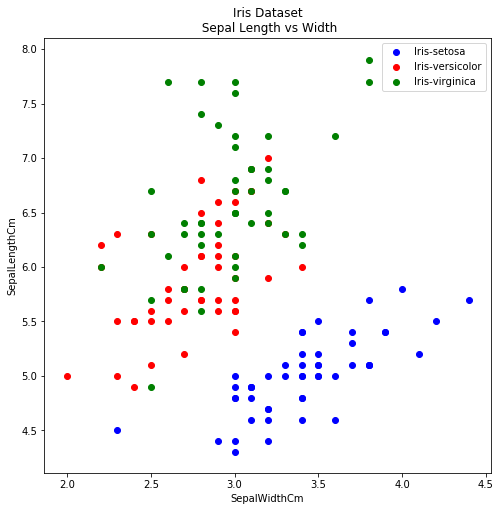

In [11]:
crea_scatter_two_cols(iris, 
                      col_y = "SepalLengthCm", 
                      col_x = "SepalWidthCm", 
                      group_by = "Species", 
                      title="Iris Dataset\n Sepal Length vs Width")

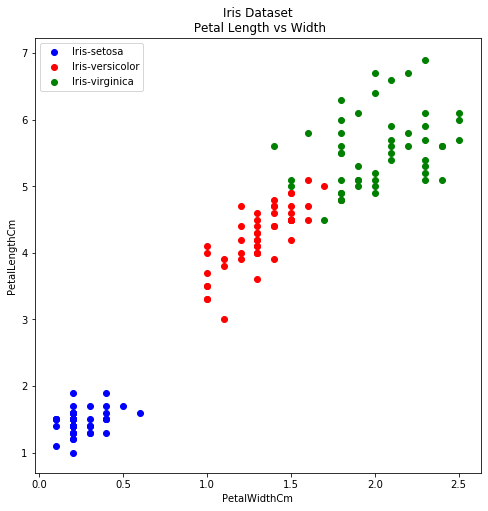

In [12]:
crea_scatter_two_cols(iris, 
                      col_y="PetalLengthCm", 
                      col_x="PetalWidthCm", 
                      group_by="Species", 
                      title="Iris Dataset\n Petal Length vs Width")

El análisis univariado es la forma más simple de analizar datos.  No trata con causas o relaciones (a diferencia de la regresión) y su propósito principal es describir y encontrar patrones en los datos.

Para ello vamos a realizar lo que se conoce como *Distribution Plots* (o **histogramas**). Los gráficos de distribución se utilizan para evaluar visualmente cómo se distribuyen los puntos de datos con respecto a su frecuencia. Por lo general, los puntos de datos se agrupan en contenedores y la altura de las barras indica el número de puntos de datos (frecuencua de aparición).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong>Para ello dividimos nuestro dataset en tres partes, una para cada una de las clases, y representamos cada una de las clases de flores por separado. 
</div>

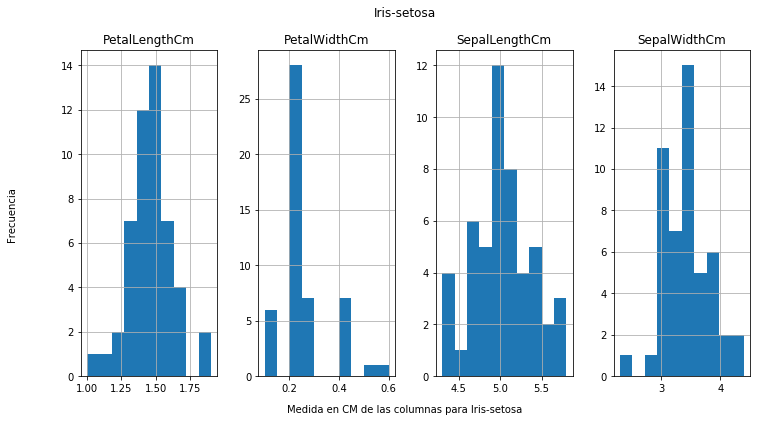

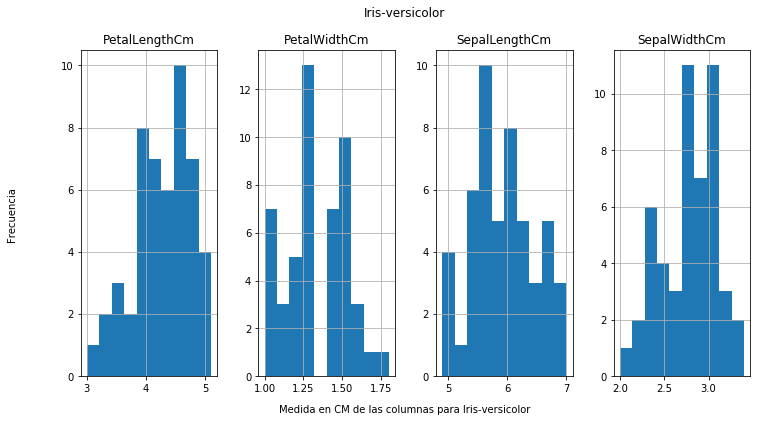

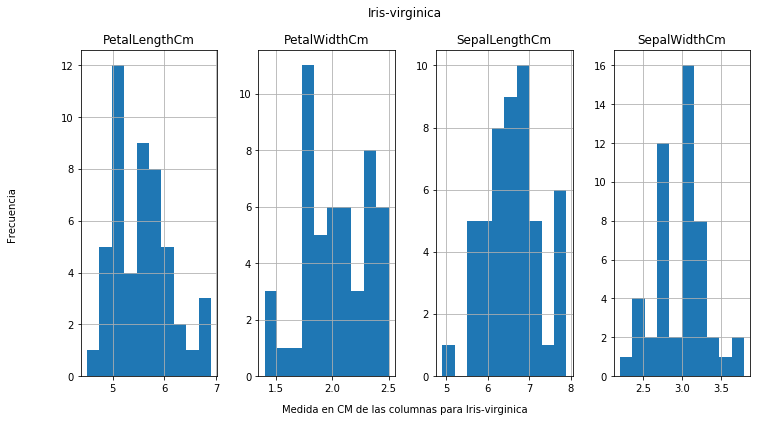

In [13]:
group_species = iris.groupby("Species")

for name, group in group_species:
    cols = group.shape[1] - 1
    fig, ax = plt.subplots(1, cols, figsize=(8,8))
    group.hist(ax=ax)
    fig.suptitle(name)
    fig.set_size_inches(12,6)
    fig.text(0.5, 0.04, 'Medida en CM de las columnas para {0}'.format(name), ha='center')
    fig.text(0.04, 0.5, 'Frecuencia', va='center', rotation='vertical')


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> A tenor de los resultados vistos hasta el momento, ¿qué conclusiones podrías extraer de los histogramas?.
</div>

Que existe una frecuencia que hace tendencia a que los petalos de las setosas son más pequeños y menos anchos que el resto, por contraparte existen una mayor frecuencia para determinar que la clase virginica tiene a ser de pétalos más grandes y anchos que el resto, lo mismo para los sépalos.

Un **diagrama de caja** (*box plot*) es una forma estandarizada de mostrar la distribución de datos basada en un resumen de cinco números ("mínimo", primer cuartil (Q1), mediana, tercer cuartil (Q3) y "máximo"). Los *box plots* nos informan sobre valores atípicos y cuáles son sus valores. También puede decirnos si los datos son simétricos, si están agrupados y si están sesgados. Para realizarlos podemos usar la función `boxplot` de `seaborn`.

<img src="figs/box-plot.png">

El **_Violin Plot_** es un método para visualizar la distribución de datos numéricos de diferentes variables. Es similar al diagrama de caja (*box plot*) pero con un diagrama rotado en cada lado que brinda más información sobre la estimación de densidad en el eje y. La densidad se refleja y se voltea y la forma resultante se rellena creando una imagen que se parece a un violín. La ventaja de una trama de violín es que puede mostrar matices en la distribución que no son perceptibles en una gráfica de caja. Por otro lado, el diagrama de caja muestra más claramente los valores atípicos en los datos. Los gráficos de violín suelen contener más información que los gráficos de caja aunque son menos populares. 

Ahora tracemos los gráficos de violín para nuestro conjunto de datos de iris. Para ello podemos utilizar la función `violinplot` de `seaborn` . Para su interpretación tengamos en cuenta que el rectángulo que aparece en el  *violin plot* equivale a la información que nos da el *box plot* y que el círculo blanco nos indica donde está el percentil 50. 

Por último realizaremos un pequeño estudio mediante un *__pair-plot__* para visualizar posibles relaciones entre nuestras variables (por pares).

En este caso emplearemos la función `pairplot` de la librería `seaborn`.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Realiza las correspondientes visualizaciones de los box-plots, violin-plots y pair-plot.
</div>

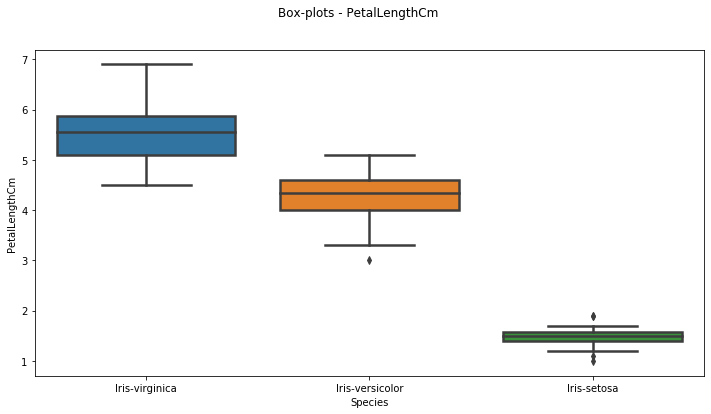

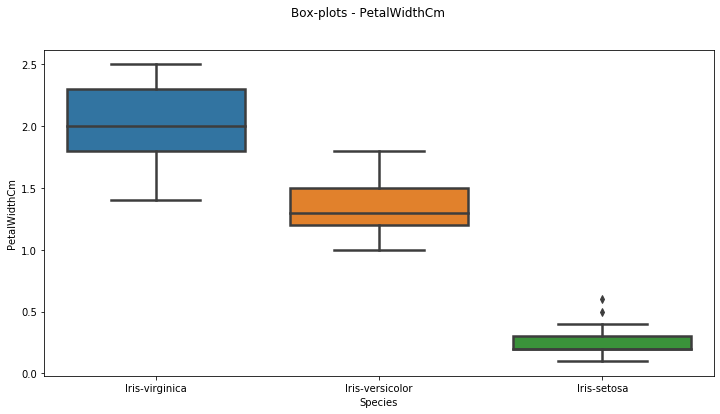

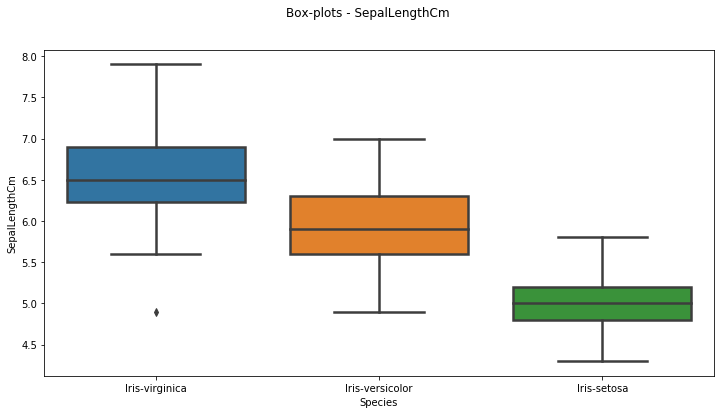

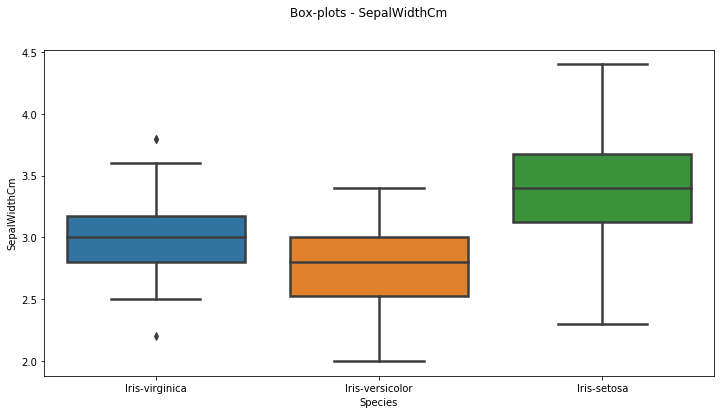

In [14]:
# iris.boxplot(by="Species", figsize=(20, 10))

cols = ["PetalLengthCm", "PetalWidthCm", "SepalLengthCm", "SepalWidthCm"]
for col in cols:
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    ax = sns.boxplot(x="Species",
                     y=col,
                     data=iris,
                     order=['Iris-virginica','Iris-versicolor','Iris-setosa'],
                     linewidth=2.5,
                     orient='v',
                     dodge=False)
    fig.suptitle("Box-plots - {0}".format(col))
    fig.set_size_inches(12,6)


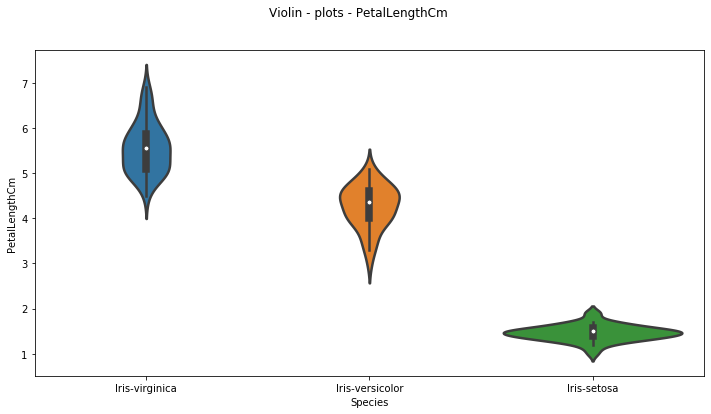

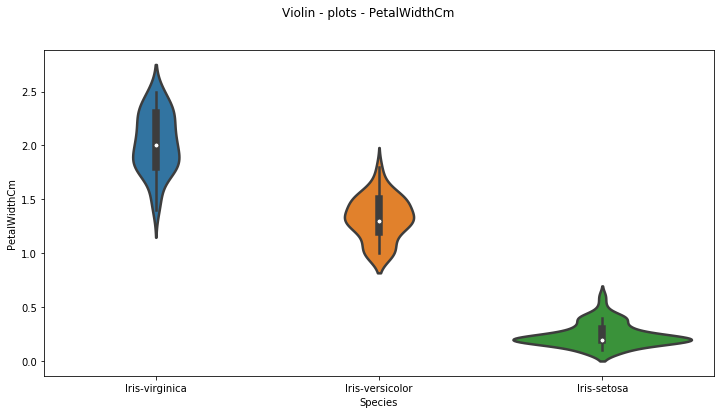

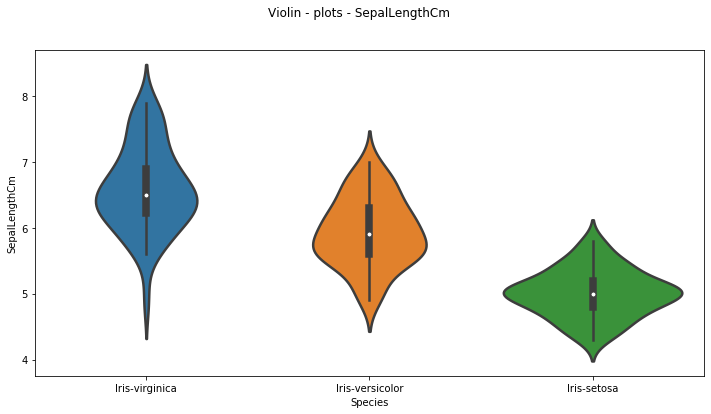

In [15]:
cols = ["PetalLengthCm", "PetalWidthCm", "SepalLengthCm", "SepalWidthCm"]
for col in cols:
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    ax = sns.violinplot(x="Species",
                     y=col,
                     data=iris,
                     order=['Iris-virginica','Iris-versicolor','Iris-setosa'],
                     linewidth=2.5,
                     orient='v',
                     dodge=False)
    fig.suptitle("Violin - plots - {0}".format(col))
    fig.set_size_inches(12,6)

In [16]:
sns.pairplot(data=iris, hue='Species');

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué conclusiones podrías sacar de la visualización de tu dataset mediante diagramas de cajas, diagramas de violín y un gráfico de dispersión?
</div>

**Diagrama de cajas**: Puedo interpretar que para las clases setosa, versicolor y virginica en largo y ancho de los petalos pueden estar clasificados y ser distingos para cada una de las especies. En general y aparentemente todas pudiesen ser clasificadas por sus medidas, en especial la setosa que es la más pequeña.

La anchura de sépalo es la mas alta para la setosa y más baja en versicolor.

**violinplot**: La densidad de valores es muy compacta para las características del pétalo con excepción de la setosa. Los violinplot del sepalo son más amplios, por lo que se puede asumir de una tendencia más variada respecto a los anchos sobre los altos.

**Gráfico de dispersión**: Para la clase setosa se puede establecer diferencias en cuanto a las características del pétalo y sépalo. 


# Aplicación de modelos 

Antes de aplicar ningún modelo, tenemos que separar los datos entre los conjuntos de *train* y *test*. Siempre trabajaremos sobre el conjunto de *train* y evaluaremos los resultados en el conjunto de *test*.


Es importante tener en cuenta que nuestra variable target es categórica. El clasificador `KNeighborsClassifier` no acepta etiquetas de tipo `string`, por lo que debemos tranformar estas etiquetas a números (esto es lo que conocemos como *__Label encoding__*). 

Para ello dividiremos el dataset en dos arrays: X (características) e Y (etiquetas) y aplicaremos la siguiente correspondencia: 

- Iris-setosa corresponde a 0
- Iris-versicolor corresponde a 1 
- Iris.virginica corresponde a 2

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
Para poder visualizar las fronteras de decisión de los diferentes métodos, primero lo haremos con las caracterísiticas del sépalo y después con la del pétalo.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Dividir el dataset en dos subconjuntons, train (80% aprox.) y test. Podeis usar la implementación train_test_split de sklearn.
</div>

In [17]:
# original dataframe
iris_original = iris.copy()

In [18]:
label_encoding = {'Iris-setosa':0, 
                  'Iris-versicolor':1,
                  'Iris-virginica':2 }

iris['Species'] = [label_encoding[x] for x in iris['Species']]

In [19]:
def extract_cols(df, cols=[]):
    df = df.loc[:, df.columns.isin(cols)]
    return df

In [20]:
# Sépalo - dos arrays: X (características) e Y (etiquetas) 
cols = ["SepalLengthCm", "SepalWidthCm"]
X = extract_cols(iris, cols)
y = iris.Species

# Estandarizamos valores
X = StandardScaler().fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

A lo largo de los ejercicios aprenderemos a visualizar gráficamente las fronteras de decisión que nos devuelven los diferentes modelos. Para este fin usaremos la función definida a continuación (que nos servirá para trazar las respectivas fronteras de decisión a lo largo de toda la PEC), la cual sigue los siguientes pasos:

- Crea una [meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) con los valores mínimo y máximo de x e y.
- Entrena el clasificador con los valores de la *meshgrid*.
- Hace un *reshape* de los datos para obtener el formato correcto.

Después de este proceso, ya podemos hacer el gráfico de las fronteras de decisión y añadir los puntos reales.
Así veremos las areas en las que el modelo considera que son de una clase y las que considera que son de la otra. Al poner encima los puntos reales veremos si los clasifica correctamente.

In [22]:
# Definimos la función que nos graficará las fronteras de decisión
    
def plot_decision_boundaries(model, X, y, delta: float = .02) -> None:
    """Plot data points and deicision boundaries learned by the model.
    
    Arguments:
    ----------
    model: scikit-learn like model
    
    X: np.array[n_samples, n_features]
        Only first 2 features will be considered because it is a 2d plot.
        Feature 0 in the x axis, and feature 1 in the y axis.
        
    y: np.array
        Labels for each sample.
        
    delta: float
        Increment between consecutive points when computing the grid for plotting boundaries.
        Lower value for higher resolution.
    """

    # Creamos la meshgrid con los valores mínimo y máximo de 'x' i 'y'.
    # La variable X es nuestro dataframe con las variables a estudiar (las del pétalo o las del sépalo)

    # He movido dentro de la función estás lineas, pues cada vez que se altera las columnas en estudio, 
    # sépalos o pétalos queda con el X del primer conjunto analizado. Así cada vez que se instancia la
    # función se recalcula.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, delta),
                         np.arange(y_min, y_max, delta))
    
    #Predecimos el clasificador con los valores de la meshgrid
    # En este caso model será nuestra variable que contiene el modelo a estudiar, es decir K-nn, SVM,...
    # Por ejemplo para K-nn sería model = KNeighborsClassifier()
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Creamos mapas de colores con ListedColormap para ver como separa las clases. 
    # En este caso usaremos: 
    # Iris-setosa : darkorange
    # Iris-versicolor: c
    # Iris-virginica: darkblue
    
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
    
    # Ponemos el resultado en una figura de color
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap= cmap_light)

    # Dibujamos también los puntos de entrenamiento
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap= cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()
    
    

## 1. $k$ nearest neighbours (2 puntos)

El primer algoritmo que usaremos para clasificar los puntos es el $k$-nn. En este ejercicio ajustaremos dos hiperparámetros para tratar de obtener una mayor precisión:

- $k$: el número de vecinos que se consideran para clasificar un nuevo ejemplo. Probaremos todos los valores entre 1 y 10.
- pesos: importancia que se le da a cada vecino. En este caso probaremos dos opciones: pesos uniformes, donde todos los vecinos son considerados igual; y pesos según la distancia, donde los vecinos más próximos tienen más peso que los vecinos más lejanos.

Para decidir los hiperparámetros óptimos usaremos la técnica de *__grid search__*, que consiste en entrenar un modelo para cada combinación posible de hiperparámetros y la evaluaremos usando *cross validation* con 4 particiones estratificadas. Posteriormente, escojeremos la combinación de hiperparametros que haya obtenido mejores resultados.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    <strong>Implementación:</strong> Calcula el valor óptimo de los hiperparámetros <i>k</i> y <i>pesos</i>. A continuación, haz un <i>heatmap</i> para visualizar las precisiones según los dos hiperparámetros.
</div>

Para resolver la primer parte podéis usar los módulos `GridSearchCV` y `KNeighborsClassifier` de `sklearn`.
Para la visualización del *heatmap* podéis usar la función [pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html) que permite la librería `Pandas`. 

In [23]:
# https://www.youtube.com/watch?v=Gol_qOgRqfA

# define values
k_range = list(range(1, 11))
weights = ["uniform", "distance"]


param_grid = dict(n_neighbors=k_range, weights=weights)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance']}


In [24]:
model = KNeighborsClassifier()
grid = GridSearchCV(model, param_grid=param_grid, cv=4)
grid.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
# https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/

all_mean = grid.cv_results_["mean_test_score"]
all_std = grid.cv_results_["std_test_score"]
all_params = grid.cv_results_["params"]

Entiendo de lo anterior lo siguiente:

* Que el mean score, entre más alto la estimación es mucho más aceptable.
* Que si el resultado de std es alta, la estimación de la precisión podría no ser tan confiable.
* Los parámetros son los que corresponden a la mejor estimación.

In [26]:

def get_best_params(all_mean, all_std, all_params):
    best_mean = None
    best_std = None
    best_params = None
    for mean, std, params in zip(all_mean, all_std, all_params):
        #print(mean, std, params)
        if best_mean is None:
            best_mean = mean
            best_std = std
            best_params = params
        elif best_mean <= mean: 
            if std != 0 or best_std >= std:
                best_mean = mean
                best_std = std
                best_params = params

    print("El mejor parámetro encontrado es: mean: {:.2f} std: {:.2f} con parámetros {}".format(best_mean, 
                                                                                         best_std,
                                                                                         best_params))

get_best_params(all_mean, all_std, all_params)

El mejor parámetro encontrado es: mean: 0.81 std: 0.04 con parámetros {'n_neighbors': 9, 'weights': 'uniform'}


In [27]:
# gráfico para ver los resultados desde otra perspectiva.

def graph_best_param(all_mean, all_std):
    uniform = [all_mean[i] for i in range(len(all_mean)) if i%2==0]
    distance = [all_mean[i] for i in range(len(all_mean)) if i%2==1]

    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax.plot(k_range, uniform, label="Mean uniform")
    ax.plot(k_range, distance, label="Mean distance")
    ax.title.set_text("Mean Score")
    ax.set_xlabel('Value of K for KNN')
    ax.set_ylabel('Mean values')
    ax.legend(loc='best')

    # std score
    uniform = [all_std[i] for i in range(len(all_std)) if i%2==0]
    distance = [all_std[i] for i in range(len(all_std)) if i%2==1]

    ax2.plot(k_range, uniform, label="std uniform")
    ax2.plot(k_range, distance, label="std distance")
    ax2.title.set_text("STD Score")
    ax2.set_xlabel('Value of K for KNN')
    ax2.set_ylabel('STD values')
    ax2.legend(loc='best')

graph_best_param(all_mean, all_std)

In [28]:
# lo devuelve la función
def best_values_grid_atributes(grid):
    print(grid.best_score_)
    print(grid.best_params_)
    print(grid.best_estimator_)
    
best_values_grid_atributes(grid)

0.8083333333333333
{'n_neighbors': 5, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Con esto puedo confirmar que los mejores parámetros son: 'n_neighbors': 5, 'weights': 'uniform'

In [29]:
def create_heatmap_knn(all_mean, all_params):
    n_neighbors = [x['n_neighbors'] for x in all_params]
    weights = [x['weights'] for x in all_params]

    df = pd.DataFrame(list(zip(n_neighbors, 
                               weights, 
                               all_mean)), 
                      columns=['n_neighbors', 'weights', 'means'])
    pivot = df.pivot('n_neighbors', 'weights', 'means')
    sns.heatmap(pivot)

create_heatmap_knn(all_mean, all_params)

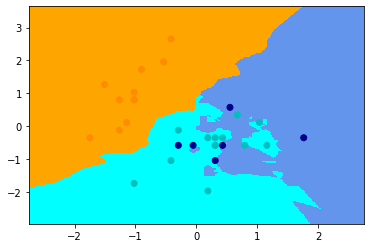

In [30]:
model = KNeighborsClassifier(n_neighbors=5, weights='uniform')
model.fit(X, y)
plot_decision_boundaries(model, X_test, y_test)

In [31]:
# Pétalo - dos arrays: X (características) e Y (etiquetas) 
cols = ["PetalLengthCm", "PetalWidthCm"]
X = extract_cols(iris, cols)
y = iris.Species

# Estandarizamos valores
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#model
model = KNeighborsClassifier()
grid = GridSearchCV(model, param_grid=param_grid, cv=4)
grid.fit(X_train, y_train)

# values
all_mean = grid.cv_results_["mean_test_score"]
all_std = grid.cv_results_["std_test_score"]
all_params = grid.cv_results_["params"]

get_best_params(all_mean, all_std, all_params)
graph_best_param(all_mean, all_std)
best_values_grid_atributes(grid)

El mejor parámetro encontrado es: mean: 0.98 std: 0.01 con parámetros {'n_neighbors': 1, 'weights': 'distance'}
0.9750000000000001
{'n_neighbors': 1, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


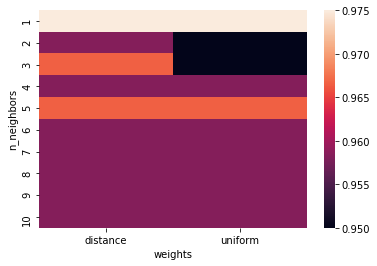

In [32]:
create_heatmap_knn(all_mean, all_params)

In [33]:
model = KNeighborsClassifier(n_neighbors=1, weights='distance')
model.fit(X, y)
plot_decision_boundaries(model, X_test, y_test)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué parámetros han dado mejores resultados? ¿Qué variación hay entre las diferentes combinaciones de parámetros? ¿Es significativa la variación entre las diferentes combinaciones? ¿Hay algún parámetro con más influencia que otro? ¿Era previsible?
</div>

Existe una diferencia notoria entre los gráficos respecto a los pétalos y sépalos. Pues para los pétalos se puede lograr clasificar un 80.83% de los casos utilizando los parámetros 'n_neighbors': 5, 'weights': 'uniform'. Se puede ver en el plano de fronteras que existen puntos que logran superar los límites de las fronteras los test, lo que asume que no se está bien clasificado respecto a su clase.

En los pétalos se logra clasificar con precisión el 97.5% de los casos, se ve que no existen puntos de test que sobrepasen la frontera de decisión en el plano.

Me parece que por los otros plano pudiese interpretar que los pétalos obtendría un mejor resultado respecto a los pétalos.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Representa gráficamente la frontera de decisión. 

<strong>Opcional ("BONUS TRACK") </strong> : Mejora la función meshgrid proporcionada de forma que a la hora de realizar gráficamente las fronteras de decisión (durante todos los apartados de la PEC) los colores se degraden en función de la probabilidad de forma que se vea las zonas de incertidumbre de los diferentes algoritmos.
</div>

In [34]:
# ¿?

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Analiza los resultados y en especial la frontera de decisión.
</div>

In [35]:
# ¿?

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    <strong>Implementación:</strong> Realizar el mismo proceso, pero en este caso para la altura-anchura de los pétalos. </div>

In [36]:
# ¿no es lo mismo que se hizo arriba?

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    <strong>Implementación:</strong> En este punto habrás comprobado que las características relacionadas con el pétalo discriminan mejor las especies de la flor de iris que las caracterísiticas relacionadas con el sépalo. Realiza las predicciones con las KNN usando las características del pétalo y calcula su precisión y matriz de confusión.</div>

In [37]:
model = KNeighborsClassifier(n_neighbors=1, weights='uniform')
model.fit(X_train, y_train)
predict = model.predict(X_test)
confusion_matrix(y_test, predict)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

Por lo visto se han clasificado todos los puntos hacia alguna clase, se asumo esto por lo altamente preciso que logra ser el modelo de respecto a los pétalos (97.5%).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> A tenor de los resultados, ¿con cuáles características obtenemos una mejor frontera de decisión y por lo tanto discriminamos mucho mejor las clases de flores de iris? (no hace falta hacerlo de forma numérica, visualmente sería suficiente). Analiza las posibles ventajas y limitaciones del algoritmo. 
</div>

Con las caracteristicas del alto y ancho de los pétalos obtenemos la mejor frontera de decisión para clasificar las flores de iris.

## 2. Support Vector Machine (2 puntos)

En este segundo ejercicio clasificaremos los puntos usando el algoritmo SVM con diferentes tipos de *kernel*. En este caso utilizaremos un *kernel* radial, un *kernel* lineal y un *kernel* polinomial de grado 3. Volveremos a usar una búsqueda en grid (*grid search*) para la optimización de los hiperparámetros. 

En este caso los hiperparámetros a optimitzar son:

- C: es la regularización, es decir, el valor de penalización de los errores de clasificación. Probaremos los valores: 0.01, 0.1, 1, 10, 50, 100 y 200.
- gamma: coeficiente que multiplica la distancia entre dos puntos en el *kernel*. A *grosso modo*, cuanto más pequeño sea gamma, más influencia tienen dos puntos proximos. Probaremos los valores: 0.001, 0.01, 0.1, 1 y 10.

Como en el caso anterior, para validar el rendimiento del algoritmo usaremos la validación cruzada (*cross-validation*) con 4 particiones estratificadas. En este caso solo lo haremos para las características **altura-anchura del pétalo.** xD

Material adicional que os puede servir de ayuda: 

- *Introduction to Statistical Learning*. Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani

- *Support Vector Machines Succinctly*. Alexandre Kowalczyk

- *A Practical Guide to Support Vector Classification*. Chih-Wei Hsu, Chih-Chung Chang, and Chih-Jen Lin

- *Tutorial sobre Máquinas de Vector Soporte (SVM)*. Enrique J. Carmona Suárez

- *A Gentle Introduction to Support Vector Machines in Biomedicine*. Alexander Statnikov, Douglas Hardin, Isabelle Guyon, Constantin F. Aliferis

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    <strong>Implementación:</strong> Calcula el valor óptimo de los hiperparámetros <i>C</i> y <i>gamma</i>. Hacer un <i>heatmap</i> para visualizar el valor de precisión según los dos hiperparámetros.
</div>

Podéis usar los módulos `GridSearchCV` y `svm` de `sklearn`. Analizar que influencia tienen los hiperparámetros C y *gamma* una vez calculados los mejores hiperparámetros. Para cada tipo de kernel, hacer predicciones para cada uno de ellos, calcular su matriz de confusión y finalmente dibujar sus fronteras de decisión.

In [38]:
# Pétalo - dos arrays: X (características) e Y (etiquetas) 
cols = ["PetalLengthCm", "PetalWidthCm"]
X = extract_cols(iris, cols)
y = iris.Species

# Estandarizamos valores
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#params
param = {"C": [0.01, 0.1, 1, 10, 50, 100, 200], 
         "gamma": [ 0.001, 0.01, 0.1, 1 , 10]}

#model
model = SVC(kernel='rbf')
grid = GridSearchCV(model, param_grid=param, cv=4)
grid.fit(X_train, y_train)

# values
all_mean = grid.cv_results_["mean_test_score"]
all_std = grid.cv_results_["std_test_score"]
all_params = grid.cv_results_["params"]
  
get_best_params(all_mean, all_std, all_params)
best_values_grid_atributes(grid)

El mejor parámetro encontrado es: mean: 0.98 std: 0.01 con parámetros {'C': 200, 'gamma': 10}
0.9750000000000001
{'C': 10, 'gamma': 10}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [39]:
def create_heatmap_svm(all_mean, all_params):
    C = [x['C'] for x in all_params]
    gama = [x['gamma'] for x in all_params]

    df = pd.DataFrame(list(zip(C, 
                               gama, 
                               all_mean)), 
                      columns=['C', 'gamma', 'means'])
    pivot = df.pivot('C', 'gamma', 'means')
    sns.heatmap(pivot)

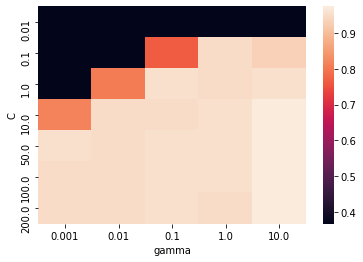

In [40]:
create_heatmap_svm(all_mean, all_params)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    <strong>Implementación:</strong> Dibuja las fronteras de decisión para cada tipo de <i>kernel</i> (con la configuración de parámetros óptima en los diferentes modelos) y calcula la precisión en training y test del mejor modelo. 
</div> 

In [41]:
# resultado de best_score grid atributes
model = SVC(kernel='rbf', C=10, gamma=10)
model.fit(X, y)
plot_decision_boundaries(model, X_test, y_test)

In [42]:
# resultado encontrado por mi función
model = SVC(kernel='rbf', C=200, gamma=10)
model.fit(X, y)
plot_decision_boundaries(model, X_test, y_test)

In [43]:
# kernel linear

#model
model = SVC(kernel='linear')
grid = GridSearchCV(model, param_grid=param, cv=4)
grid.fit(X_train, y_train)

# values
all_mean = grid.cv_results_["mean_test_score"]
all_std = grid.cv_results_["std_test_score"]
all_params = grid.cv_results_["params"]
  
get_best_params(all_mean, all_std, all_params)
best_values_grid_atributes(grid)

El mejor parámetro encontrado es: mean: 0.96 std: 0.03 con parámetros {'C': 200, 'gamma': 10}
0.9583333333333333
{'C': 0.1, 'gamma': 0.001}
SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [44]:
create_heatmap_svm(all_mean, all_params)

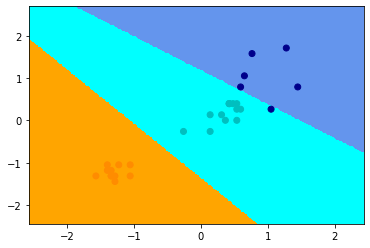

In [45]:
# resultado de best_score grid atributes
model = SVC(kernel='linear', C=0.1, gamma=0.001)
model.fit(X, y)
plot_decision_boundaries(model, X_test, y_test)

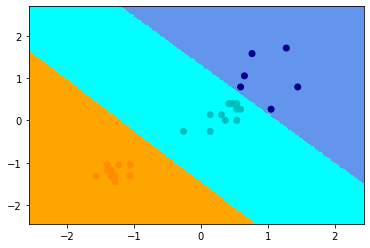

In [46]:
# resultado encontrado por mi función
model = SVC(kernel='linear', C=200, gamma=10)
model.fit(X, y)
plot_decision_boundaries(model, X_test, y_test)

In [47]:
# kernel poly

#model
model = SVC(kernel='poly')
grid = GridSearchCV(model, param_grid=param, cv=4)
grid.fit(X_train, y_train)

# values
all_mean = grid.cv_results_["mean_test_score"]
all_std = grid.cv_results_["std_test_score"]
all_params = grid.cv_results_["params"]
  
get_best_params(all_mean, all_std, all_params)
best_values_grid_atributes(grid)

El mejor parámetro encontrado es: mean: 0.98 std: 0.01 con parámetros {'C': 50, 'gamma': 10}
0.9750000000000001
{'C': 10, 'gamma': 10}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


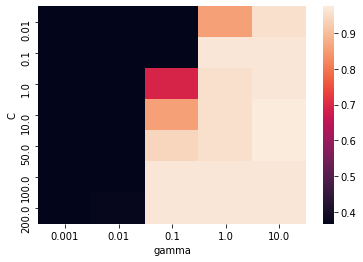

In [48]:
create_heatmap_svm(all_mean, all_params)

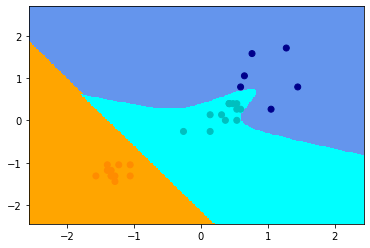

In [49]:
# resultado de best_score grid atributes
model = SVC(kernel='poly', C=10, gamma=10)
model.fit(X, y)
plot_decision_boundaries(model, X_test, y_test)

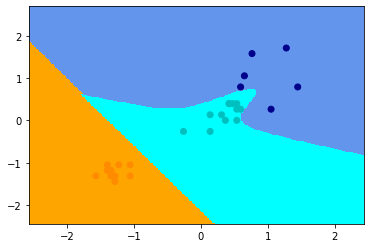

In [50]:
# resultado encontrado por mi función
model = SVC(kernel='poly', C=50, gamma=10)
model.fit(X, y)
plot_decision_boundaries(model, X_test, y_test)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué parámetros han dado mejores resultados? ¿Qué variación hay entre las diferentes combinaciones de parámetros? ¿Es significativa la variación entre las diferentes combinaciones? ¿Qué kernel ha ido mejor? ¿Hay algún parámetro con más influencia que otro? ¿Era previsible? 
    
Compara visualmente las fronteras de decisión del SVM para los distintos kernels con la frontera de decisión del KNN y analiza las ventajas y desventajas del método. 
</div>

Intentando interpretar los mejores parámetros para el kernel radial han sido: {'C': 10, 'gamma': 10} obtenido por el resultado de la clase GridSearchCV (best_score_), mientras que para mi función he encontrado {'C': 200, 'gamma': 10}. La precisión en el training set es del 97.5%.

Para el kernel linear se ha obtenido un 95.8% con los parámetros de {'C': 0.1, 'gamma': 0.001} obtenidos de la clase GridSearchCV (best_score_), mientras que con {'C': 200, 'gamma': 10} se obtiene una mejor vista, pues los valores de entrenamiento no sobrepasan los fronteras de decisión, y creo que para este parámetro de kernel es la mejor opción.

La opción de kernel poly los valores son {'C': 10, 'gamma': 10} pbtenido de la clase GridSearchCV (best_score_), mientras que la implementación propia promueve {'C': 50, 'gamma': 10}, se logra un entrenamiento de 97.5% de precisión.

Creo que en sus distintas formas de kernel pueden dar resultados significativos. Puede que por el retorno de los atributos que traen consigo los valores por defecto incline la balanza hacia el kernel radial y poly, pero buscando los atributos podemos encontrar un ajuste mejor para que los resultados sean mejores.

Viendo los heatmap, me parece que la variable gama en casos como la configuración linear es poco significativa, pues posee tendencias horizontales, por lo que C es una variable influyente para los resultados.

## 3. Árboles de decisión (2 puntos)

En este tercer ejercicio trazaremos las fronteras de decisión de los dos tipos de atributos (sépalos y pétalos). Veremos que precisión obtenemos con los árboles de decisión. Mapearemos el árbol y lo analizaremos. 

Para dibujar el árbol necesitaremos instalar la librería `graphviz`. Para ello desde terminal escribiremos el siguiente comando: 

> sudo apt-get install graphviz

Si alguno utiliza el entorno Conda también puede instalarse desde este entorno. 

Los árboles de decisión son un método usado en distintas disciplinas como modelo de predicción. Estos son similares a diagramas de flujo, en los que llegamos a puntos en los que se toman decisiones de acuerdo a una regla. 

En el campo del aprendizaje automático hay distintas maneras de obtener árboles de decisión, la que usaremos en esta ocasión es conocida como CART: *Classification And Regression Trees*. Esta es una técnica de aprendizaje supervisado. Tenemos una variable objetivo (dependiente) y nuestra meta es obtener una función que nos permita predecir, a partir de variables predictoras (independientes), el valor de la variable objetivo para casos desconocidos.

Como el nombre indica, CART es una técnica con la que se pueden obtener árboles de clasificación y de regresión. Usamos clasificación cuando nuestra variable objetivo es discreta, mientras que usamos regresión cuando es continua. Nosotros tendremos una variable discreta, así que haremos clasificación.

De manera general, lo que hace este algoritmo es encontrar la variable independiente que mejor separa nuestros datos en grupos, las cuales corresponden con las categorías de la variable objetivo. Esta mejor separación es expresada con una regla. A cada regla le corresponde un nodo.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    <strong>Implementación:</strong> Dibuja el árbol de decisión. 
</div>

Para ello debemos asegurarnos que tenemos instalada en nuestro entorno la librería [graphviz](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html). 

In [51]:
# All
cols = ["PetalLengthCm", "PetalWidthCm", "SepalLengthCm", "SepalWidthCm"]
X = extract_cols(iris, cols)
y = iris.Species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = tree.DecisionTreeClassifier(criterion='gini', 
                                    min_samples_split=20,
                                    min_samples_leaf=5,
                                    max_depth = 4)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:

def crea_arbol_graphviz(model, cols):
    tree.export_graphviz(model,
                         out_file="tree.dot",
                         feature_names=cols,
                         class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],
                         filled=True,                     
                         precision = 4)


    with open("tree.dot") as f:
        dot_graph = f.read()

    graph=graphviz.Source(dot_graph)
    graph.format = "png"
    graph.render("tree.dot")
    return graph
    


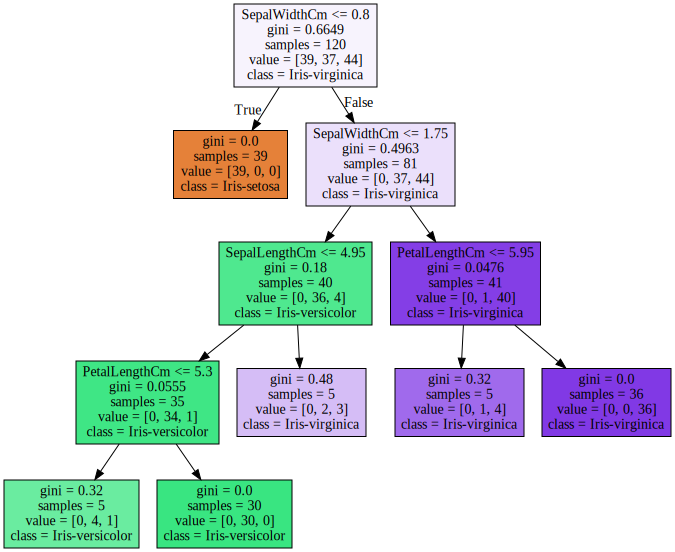

In [53]:
crea_arbol_graphviz(model, cols)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    <strong>Análisis:</strong> Como se puede observar el árbol de decisión nos muestra diferente información. Analiza dicha información y explícala. 
    Un parámetro muy importante en este método es el índice Gini. Explica en qué consiste y qué influencia tiene en la construcción del árbol de decisión.
    Por último, comenta las principales ventajas y desventajas de los árboles de decisión.
</div>



En índice **Gini** es el valor o nivel de impureza para un nodo en particular que mide las proporciones de clases en un conjunto. La impureza de Gini viene dada por la probabilidad de seleccionar un elemento de clase del subconjunto del nodo: 

$\sum_{n=1}^{k} Pi(t)(1 - Pi(t)) $


La importancia de gini radica en que si seleccionamos aletoriamente dos items de una población, entonces estos deben ser de la misma clase y la probabilidad de esto es 1 si la población es pura.

* Variable objetivo categórica: “Success” o “Failure”
* Solo divisiones binarias
* A mayor valor de índice Gini, mayor la homogeneidad
* CART (Classification and Regression Tree) usa el método de Gini para la división binaria.

https://bookdown.org/content/2031/arboles-de-decision-parte-i.html

Para el ejemplo la decisión parte en SepalWidthCm <= 0.8, en donde se encuentran estos valores alue = [39, 37, 44] los 120 samples y se clasifica en la clase Iris-virginica. para la clase Iris-virginica de que gatillan a una clasificación distinto como cierta para la clase Iris-setosa generando un nuevo nodo, pero es totalmente limpio por lo que no tiene más profundidad. 
Para el resultado Falso, se genera una nuevo valor de decisión SepalWidthCm <= 1.75, en donde encontramos valores [value = [0, 37, 44]] (81 samples), pero tiene un nivel de impureza de 0.496 (50%), y será la clase la que definirá la clasificación de los datos establecidos en este nivel. 
Seguirá iterando mientras logre clasificar en cuanto a decisiones todos los samples. Seguramente no podrá clasificar a todos los datos con ese nivel de profundidad. Imagino que aumentando los niveles de impureza, dada la probabilidad irá disminuyendo.

Las ventajas de un árbol:

* Su construcción es sencilla, aunque puede ser costosa computacionalmente para conjuntos de entrenamiento muy grandes.
* El resultado obtenido es directamente interpretable, siendo también posible evaluar la importancia de cada variable utilizada en la construcción del modelo.
* Pueden combinar variables numéricas y categóricas en el mismo modelo, siendo invariantes a traslaciones y escalados de los datos, por lo que no es necesario normalizar los datos.
* Pueden trabajar con valores perdidos, utilizando condiciones alternativas (conocidas como surrogate splits).
* Su implementación práctica se reduce a una serie de reglas que pueden ser fácilmente escritas como un conjunto the sentencias if-then-else.


Las desventajas:
* Fragmentación: a veces una hoja es particionada en dos de forma muy desequilibrada, generando dos nuevas hojas, una con pocos elementos y la otra con la mayoría.
* Repetición: este fenómeno aparece cuando la secuencia de condiciones tomada en cada nodo interno hasta llegar a una hoja repite la misma variable, cambiando el valor por el cual se toma la decisión.
* Replicación: en muchos casos, los datos de entrada pueden presentar una estructura interna que es imposible de capturar si se usan hiperplanos o condiciones ortogonales, es decir, que solo utilizan una variable en cada decisión o nodo interno.
* Los árboles de decisión son muy sensibles al conjunto de datos de entrenamiento, por lo que la presencia de outliers puede generar ramas profundas que no generalicen bien para nuevos datos.


https://code-examples.net/es/docs/scikit_learn/modules/generated/sklearn.tree.decisiontreeclassifier

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    <strong>Implementación:</strong> Calcula la precisión de clasificación que ha obtenido el árbol de decisión que has desarrollado anteriormente.
</div>

In [54]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

La precisión de clasificación para los pétalos es de 100%

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    <strong>Implementación:</strong> Calcula las fronteras de decisión (por pares) de las características del dataset para training y para test.
</div>

In [55]:
cols = ["PetalLengthCm", "PetalWidthCm"]
# X = extract_cols(X_test, cols)
# model.fit(X_train.values.reshape(-1, 4), y_train)
# accu_train = np.sum(model.predict(X_train.values.reshape(-1, 2)) == y_train)/30
# accu_test = np.sum(model.predict(X_test.values.reshape(-1, 2)) == y_test)/30

# print("Accuracy on Train: ", accu_train)
# print("Accuracy on Test: ", accu_test)

#X_test
#plot_decision_boundaries(model, X_test.to_numpy(), y_test)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Analizar los resultados de las fronteras de decisión.
</div>

Para este caso de la fragmentación por las columnas de pétalo, las fronteras quedan definidas casi linealmente y la precisión del modelo es del 100%.

In [56]:
# Petalos
cols = ["PetalLengthCm", "PetalWidthCm"]
X = extract_cols(iris, cols)
y = iris.Species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =0)

model = tree.DecisionTreeClassifier(criterion='gini', 
                                    min_samples_split=20,
                                    min_samples_leaf=5,
                                    max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

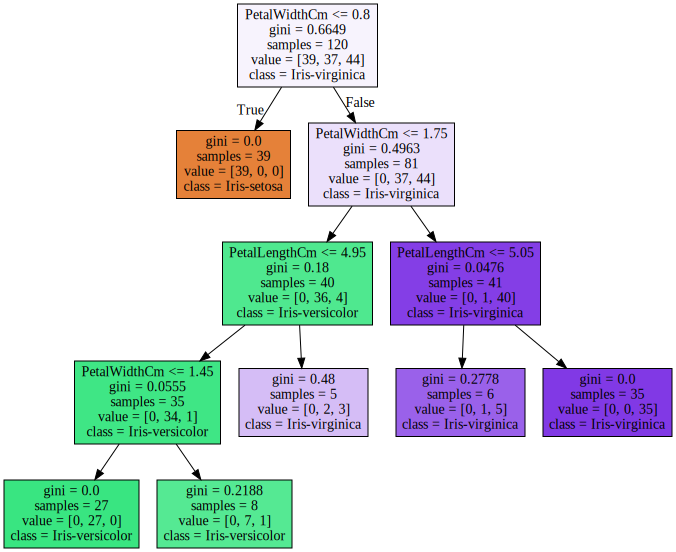

In [57]:
crea_arbol_graphviz(model, cols)

In [58]:
# Sépalos
cols = ["SepalLengthCm", "SepalWidthCm"]
X = extract_cols(iris, cols)
y = iris.Species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =0)

model = tree.DecisionTreeClassifier(criterion='gini', 
                                    min_samples_split=20,
                                    min_samples_leaf=5,
                                    max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

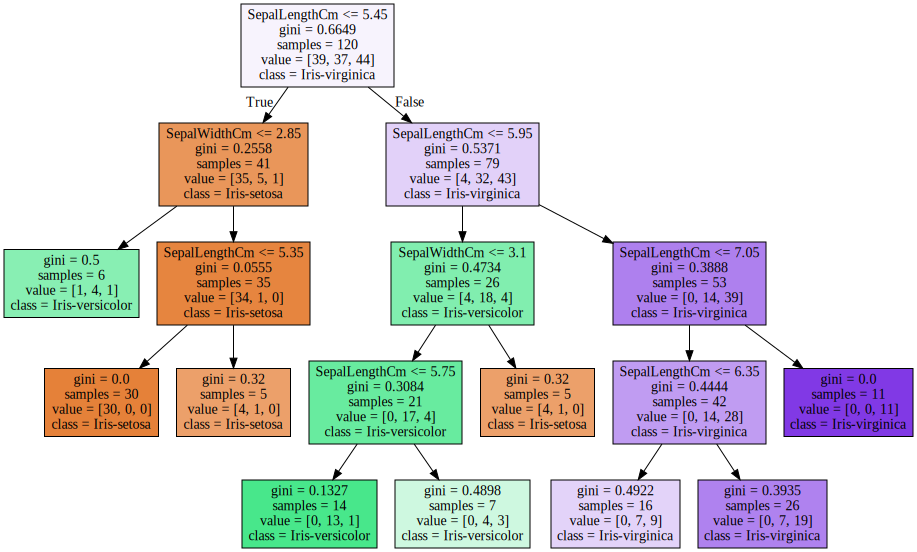

In [59]:
crea_arbol_graphviz(model, cols)

In [60]:
# Sépalos
cols = ["SepalLengthCm", "SepalWidthCm"]
X = extract_cols(iris, cols)
y = iris.Species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =0)

model = tree.DecisionTreeClassifier(criterion='gini', 
                                    min_samples_split=20,
                                    min_samples_leaf=5,
                                    max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [61]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6

Para el modelo de los sépalos, el modelo logra precisar el 60% de los datos.

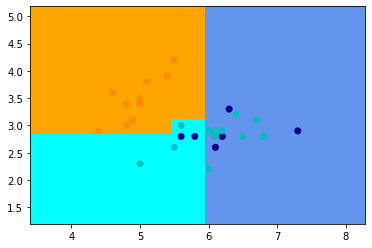

In [62]:
plot_decision_boundaries(model, X_test.to_numpy(), y_test)

Acá podemos observar que se logra clasificar correctamente la clase Iris-setosa, pero para las clases Iris-versicolor y iris-virginica los test superan las fronteras de decisión.
Esto también se visualiza en el diagrama de árbol, pues existen nodos de clasificados como gini con un valor de 11.

## 4. Random forest (2 puntos)

En este cuarto apartado clasificaremos los puntos usando un Random forest. Utilizaremos, igual que en los casos anteriores, una búsqueda en grid (*grid search*) parar ajustar los hiperparámetros.

En este caso, los hiperparámetros que debemos ajustar son:

- *max_depth*: la profundidad máxima del árbol. Exploraremos los valores entre 6 y 12. 
- *n_estimators*: nombre de árboles. Exploraremos los valores: 10, 50, 100 y 200.

Igual que en el caso anterior, usaremos validación cruzada (*cross-validation*) con 4 particiones estratificadas para validar el rendimento del algoritmo con cada combinación de hiperparámetros.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    <strong>Implementación:</strong> Calcula el valor óptimo de los hiperparámetros <i>max_depth</i> y <i>n_estimators</i>. Haz un <i>heatmap</i> para visualizar las precisiones según los dos hiperparámetros.
</div>

Podéis usar los módulos `GridSearchCV` y `RandomForestClassifier` de `sklearn`.

In [63]:
# Pétalos
cols = ["PetalLengthCm", "PetalWidthCm"]
X = extract_cols(iris, cols)
y = iris.Species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestClassifier()

param = {"max_depth": [6, 7, 8, 9, 10, 11, 12], 
         "n_estimators": [10, 50, 100, 200]}

grid = GridSearchCV(model, param_grid=param, cv=4)
grid.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [64]:
# values
all_mean = grid.cv_results_["mean_test_score"]
all_std = grid.cv_results_["std_test_score"]
all_params = grid.cv_results_["params"]
  
get_best_params(all_mean, all_std, all_params)
best_values_grid_atributes(grid)

El mejor parámetro encontrado es: mean: 0.95 std: 0.02 con parámetros {'max_depth': 12, 'n_estimators': 50}
0.95
{'max_depth': 6, 'n_estimators': 10}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


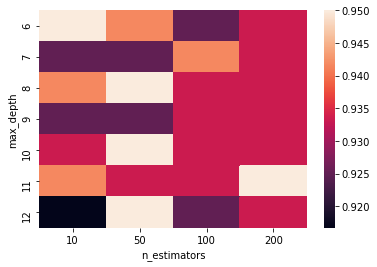

In [65]:
def create_heatmap_svm(all_mean, all_params):
    n_estimators = [x['n_estimators'] for x in all_params]
    max_depth = [x['max_depth'] for x in all_params]

    df = pd.DataFrame(list(zip(n_estimators, 
                               max_depth, 
                               all_mean)), 
                      columns=['n_estimators', 'max_depth', 'means'])
    # pivot = df.pivot('n_estimators', 'max_depth', 'means')
    pivot = df.pivot('max_depth', 'n_estimators', 'means')
    sns.heatmap(pivot)

create_heatmap_svm(all_mean, all_params)

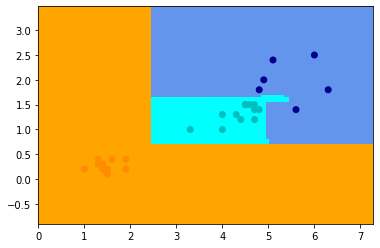

In [66]:
model = RandomForestClassifier(max_depth=11, n_estimators=10)
model.fit(X, y)
plot_decision_boundaries(model, X_test.to_numpy(), y_test)

In [67]:
# Sétalos
cols = ["SepalLengthCm", "SepalWidthCm"]
X = extract_cols(iris, cols)
y = iris.Species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestClassifier()

param = {"max_depth": [6, 7, 8, 9, 10, 11, 12], 
         "n_estimators": [10, 50, 100, 200]}

grid = GridSearchCV(model, param_grid=param, cv=4)
grid.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [68]:
# values
all_mean = grid.cv_results_["mean_test_score"]
all_std = grid.cv_results_["std_test_score"]
all_params = grid.cv_results_["params"]
  
get_best_params(all_mean, all_std, all_params)
best_values_grid_atributes(grid)

El mejor parámetro encontrado es: mean: 0.79 std: 0.04 con parámetros {'max_depth': 6, 'n_estimators': 100}
0.7916666666666667
{'max_depth': 6, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


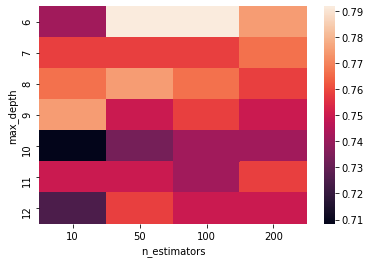

In [69]:
create_heatmap_svm(all_mean, all_params)

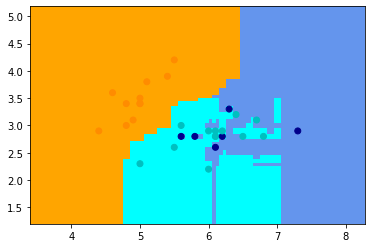

In [70]:
model = RandomForestClassifier(max_depth=10, n_estimators=10)
model.fit(X, y)
plot_decision_boundaries(model, X_test.to_numpy(), y_test)

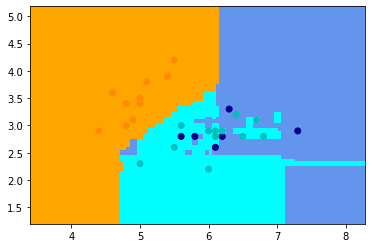

In [71]:
model = RandomForestClassifier(max_depth=8, n_estimators=100)
model.fit(X, y)
plot_decision_boundaries(model, X_test.to_numpy(), y_test)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué parámetros han dado mejores resultados? ¿Qué variación hay entre las diferentes combinaciones de parámetros? ¿Es significativa la variación entre las diferentes combinaciones? ¿Hay algún parámetro con más influencia que otro? ¿Era previsible?
</div>

Los mejores parámetros obtenidos para las columnas que refieren a los pétalos son {'max_depth': 11, 'n_estimators': 10} que coinciden con la función propia realizada. Esto obtiene una precisión del modelo de un 95.83%

Para los sépalos los mejores obtenidos son {'max_depth': 10, 'n_estimators': 10} por la función propia realizada, mientras que el atributo best_values de la clase obtiene {'max_depth': 8, 'n_estimators': 100} con un 77.5% de precisión en el modelo. Es este caso tanto la función propia como la de la clase RandomForestClassifier() obtienen valores que superan las fronteras de decisión, probablemente en los mismos puntos.

Existe un diferencia significativa, pues seguimos en razón que es posible clasificar de mejor modo los pétalos por sobre los sépalos.

Por los mapas de calor, me parece que n_estimators tiene incidencia sobre la profundidad.

En la práctica anterior estuvimos estudiando la influencia de algunos de los parámetros del *Random forest*, entre ellos el parámetro `max_depth` y cómo una profundidad del árbol demasiado grande podía provocar lo que conocemos como sobreentrenamiento (*overfitting*). 

En este apartado vamos a usar las capacidades interactivas que nos ofrece la librería `plotly` para visualizar efectos del *overfitting* y como cambia la frontera de decisión debido a ello. Para ello, crearemos gráficos de dos clasificadores Random Forest, el primero con una profundidad de árbol razonable (max_depth=4) y el segundo presentando un claro *overfitting* (por ejemplo, max_depth=300). 

Invocar el código de `Plotly` es muy similar al de `Matplotlib` para generar la frontera de decisión. Necesitaremos una malla de `Numpy` para formar la base de nuestras gráficas de superficie, así como el método `predict` del modelo de aprendizaje para poblar nuestra frontera con datos.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Genera dichas visualizaciones interactivas con Plotly.
</div>

Recordar que tendréis que instalaros la libería `Plotly`. Esto se puede hacer mediante:

> pip install plotly 

**Nota**: No hace falta que lo hagáis para las cuatro características (altura-anchura del pétalo y altura-anchura del sépalo), con hacerlo para dos sería suficiente. 

In [72]:
# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

# Pétalos
cols = ["PetalLengthCm", "PetalWidthCm"]
X = extract_cols(iris, cols)
y = iris.Species

h = .02  # step size in the mesh

X = StandardScaler().fit_transform(X)


# Train two Random Forests. One with normal reasonable parameters and the other with overfitting
trees = RandomForestClassifier(max_depth=4, 
                               n_estimators=20, 
                               random_state=0)
trees.fit(X, y)

trees_overfit = RandomForestClassifier(max_depth=300, 
                                       n_estimators=5, 
                                       random_state=0)
trees_overfit.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h)
                     , np.arange(y_min, y_max, h))
y_ = np.arange(y_min, y_max, h)

Z = trees.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#Z = Z.reshape((xx.shape[0], xx.shape[1], 3))

fig = tools.make_subplots(rows=1, cols=2,
                          subplot_titles=("Random Forest (Depth = 4)",
                                          "Random Forest (Depth = 300)")
                         )

trace1 = go.Heatmap(x=xx[0], y=y_, z=Z,
                  colorscale='Viridis',
                  showscale=False)

trace2 = go.Scatter(x=X[:, 0], y=X[:, 1], 
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Viridis',
                                line=dict(color='black', width=1))
                    )
                  
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)

# transform grid using ExtraTreesClassifier
# y_grid_pred = trees.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Z = trees_overfit.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


trace3 = go.Heatmap(x=xx[0], y=y_, 
                    z=Z,
                    colorscale='Viridis',
                    showscale=True)

trace4 = go.Scatter(x=X[:, 0], y=X[:, 1],
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Viridis',
                                line=dict(color='black', width=1))
                   )
fig.append_trace(trace3, 1, 2)
fig.append_trace(trace4, 1, 2)

for i in map(str, range(1, 3)):
    x = 'xaxis' + i
    y = 'yaxis' + i
    fig['layout'][x].update(showgrid=True, 
                            zeroline=True,
                            showticklabels=True, 
                            ticks='', 
                            autorange=True)
    fig['layout'][y].update(showgrid=True, 
                            zeroline=True,
                            showticklabels=True, 
                            ticks='', 
                            autorange=True)

py.iplot(fig)

/home/fabio/Repositorio/python/anaconda3/envs/mineriadatos/lib/python3.8/site-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Literalmente reutilicé el código desde acá: https://www.kaggle.com/arthurtok/decision-boundaries-visualised-via-python-plotly#Interactive-Plotly-visualisations.

Llegué a esto pues tuve problemas con plotpy por referencias cruzadas CRC para archivos tipo JavaScript, hay que deshabilitar una serie de configuraciones de seguridad y privacidad en el navegador para que muestre el gráfico.

Respecto al gráfico, en el sobreentrenamiento visualmente cruza todo el centro de una clase que demuestra que se hace parte del cuadro, pero no logra clasificar nada.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Razona las ventajas y desventajas del algoritmo de Random Forest. 
</div>

Dentro de las ventajas que podemos mencionar es que se es facil de implementar, pero para mi no siempre facil de interpretar.

Otra ventaja es que Los árboles de decisión pueden incluso aprender a ignorar variables explicativas que no son relevante para la tarea.

Una vez creados, Random Forest puede predecir relativamente rápido.

Puede ser una desventaja que los árboles de decisión son más propensos al overfitting que otros modelos.

## 5. Redes neuronales  (1 punto)



En esta última parte de la PEC vamos a usar la librería `Keras`. Para ello compararemos las redes con la capa densa regular [(**regular Dense Layer**)](https://keras.io/layers/core/) con un número diferente de nodos, empleando como función de activación [**Softmax**](https://www.machinecurve.com/index.php/2020/01/08/how-does-the-softmax-activation-function-work/) y como optimizador [**Adam**](https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c). 

Para ello tendremos que asegurarnos de tener las librerias `Tensorflow` y `Keras` instaladas. 

Para ello desde terminal escribiremos el siguiente comando: 

> pip install tensorflow

> pip install keras

Si alguno utiliza el entorno Conda también puede instalarse desde este entorno. 

Por otro lado, este es el apartado más complicado de toda la práctica y con el que menos estáis familiarizados. Por ello a lo largo del apartado os iremos dando una sería de enlaces a conceptos y ejemplos que os ayudarán a entender mejor lo que estamos haciendo. Es **altamente recomendable** leer con detenimiento los links (marcados en azul) y referencias indicadas y entender las explicaciones teóricas y los ejemplos de código proporcionados.

In [73]:
# Importamos la librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler


from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

# Para ignorar Warnings futuros
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.style.use('ggplot')
%matplotlib inline

Para la preparación de los datos, simplemente usaremos el [**OneHotEncoder**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) para codificar las características enteras en un [**vector One-hot**](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/) y utilizaremos un [**StandardScaler**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) para eliminar la media y escalar las características a la varianza unitaria. Finalmente, usaremos `train_test_split` para comparar nuestros resultados más adelante.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Prepara los datos de entrada en la red. Te ofrecemos de ayuda los pasos que has de realizar.
    
<strong>Pasos:</strong>
- Cargamos los datos
- One hot encoding
- Estandarizamos los datos (esto es importante para la convergencia de la red neuronal)
- Dividimos los datos en train/test
</div>

In [74]:
iris = pd.read_csv("Iris.csv")
encoder = OneHotEncoder(handle_unknown='ignore')
encoder = encoder.fit_transform(iris[['Species']]).toarray()
temp = pd.DataFrame(encoder)
# join!
iris_encoder = iris.join(temp)
iris_encoder

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species    0    1    2  
0       Iris-setosa  1.0  0.0  0.0  
1       Iris-setosa  1.0  0.0  0.0  
2       Iris-setosa  1.0  0.0  0.0  
3       Iris-setosa  1.0  0.0  0.0  
4       Iris-setosa  1.0  0.0  0.0  
..              ...  ...  ...  ...  
145  Iris-virginica  0.0  0.0  1.0  
146  Iris-virginica  0.0  0.0  1.0  
147  Iris-virginica  0.0  0.0  1.0  
148  Iris-virginica  0.0  0.0  1.0  
149  Iris-virginica  0.0  0.0  1.0  

[150 rows x 9 columns]

In [75]:
cols = ["PetalLengthCm", "PetalWidthCm", "SepalLengthCm", "SepalWidthCm"]
X = extract_cols(iris_encoder, cols)
#y = iris.Species
y = iris_encoder.iloc[:,6:9]

# Estandarizamos valores
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Configuramos nuestros modelos de red neuronal

Para ello nos definimos una función que será la encargada de realizar nuestros modelos (en este caso concreto vamos a crear tres modelos que llamaremos Model1, Model2 y Model3). Utilizaremos como **función de activación** la [función ReLu](https://medium.com/@danqing/a-practical-guide-to-relu-b83ca804f1f7) y como **función de pérdidas** la [función categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy)

Para mayor profundidad sobre el estudio de las **funciones de activación**:  
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
- https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0

Para mayor profundidad en el estudio de las **funciones de pérdidas**: 
- https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
- https://www.machinecurve.com/index.php/2019/10/22/how-to-use-binary-categorical-crossentropy-with-keras/


In [76]:
def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        
        # Creamos el modelo
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compilamos el modelo
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

n_features = 4
n_classes = 3
nodes = 8
models = [create_custom_model(n_features, n_classes, nodes, i, 'model_{}'.format(i)) 
          for i in range(1, 4)]

for create_model in models:
    create_model().summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-tr

## Entrenando los modelos

Pasamos ahora al entrenamiento. Para ello utilizaremos `TensorBoard  Callback` [1](https://www.tensorflow.org/tensorboard/scalars_and_keras), [2](https://medium.com/@kapilvarshney/how-to-plot-the-model-training-in-keras-using-custom-callback-function-and-using-tensorboard-41e4ce3cb401), [3](https://www.machinecurve.com/index.php/2019/11/13/how-to-use-tensorboard-with-keras/), [4](https://fizzylogic.nl/2017/05/08/monitor-progress-of-your-keras-based-neural-network-using-tensorboard/) para poder explorar el modelo y las salidas en detalle.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Utilizando TensorBoard Callback crea una función de entrenamiento para nuestros modelos con los siguientes parámetros: epochs = 50 y batch_size = 5. Posteriormente calcula la precisión y la pérdida en test de nuestros modelos y **guardate los modelos** para después poder visualizarlos. 
</div>

In [77]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
# https://www.tensorflow.org/api_docs/python/tf/keras/Model
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

tensorboard_callback = TensorBoard(log_dir="./logs")

print(type(models))

models_fit = []
results = []

for i in models:
    # print(i) # function -> create_model ??
    # print(i()) # Sequential object
    # name = i().name
    model = i()
    models_fit.append(model.fit(X_train, 
                     y_train,
                     batch_size=5,
                     epochs=50,
                     callbacks=[tensorboard_callback],
                     validation_data=(X_test, y_test)))
    #https://www.tensorflow.org/guide/keras/train_and_evaluate?hl=es
    result = model.evaluate(X_test, y_test, batch_size=5)
    results.append(result)
    

<class 'list'>
Epoch 1/50
24/24 [==============================] - 0s 11ms/step - loss: 1.1442 - accuracy: 0.3667 - val_loss: 1.2057 - val_accuracy: 0.2000
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 1.0472 - accuracy: 0.3667 - val_loss: 1.1171 - val_accuracy: 0.2000
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.9602 - accuracy: 0.3667 - val_loss: 1.0367 - val_accuracy: 0.2000
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.8828 - accuracy: 0.3833 - val_loss: 0.9628 - val_accuracy: 0.2667
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.8093 - accuracy: 0.6167 - val_loss: 0.9008 - val_accuracy: 0.5667
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.7474 - accuracy: 0.7417 - val_loss: 0.8371 - val_accuracy: 0.6000
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.7750 - val_loss: 0.7837 - val_accuracy: 0.6000
Epoc

24/24 [==============================] - 0s 3ms/step - loss: 0.8111 - accuracy: 0.7583 - val_loss: 0.7644 - val_accuracy: 0.6000
Epoch 9/50
24/24 [==============================] - 0s 4ms/step - loss: 0.7746 - accuracy: 0.7833 - val_loss: 0.7338 - val_accuracy: 0.6000
Epoch 10/50
24/24 [==============================] - 0s 3ms/step - loss: 0.7459 - accuracy: 0.8000 - val_loss: 0.7117 - val_accuracy: 0.6000
Epoch 11/50
24/24 [==============================] - 0s 3ms/step - loss: 0.7235 - accuracy: 0.8000 - val_loss: 0.6923 - val_accuracy: 0.6000
Epoch 12/50
24/24 [==============================] - 0s 3ms/step - loss: 0.7049 - accuracy: 0.8000 - val_loss: 0.6767 - val_accuracy: 0.6000
Epoch 13/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.8000 - val_loss: 0.6651 - val_accuracy: 0.6000
Epoch 14/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6755 - accuracy: 0.8000 - val_loss: 0.6544 - val_accuracy: 0.6000
Epoch 15/50
24/24 [=======

24/24 [==============================] - 0s 3ms/step - loss: 0.2932 - accuracy: 0.8750 - val_loss: 0.3834 - val_accuracy: 0.8333
Epoch 16/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2788 - accuracy: 0.8833 - val_loss: 0.3785 - val_accuracy: 0.8000
Epoch 17/50
24/24 [==============================] - 0s 5ms/step - loss: 0.2680 - accuracy: 0.8833 - val_loss: 0.3529 - val_accuracy: 0.8333
Epoch 18/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2575 - accuracy: 0.8917 - val_loss: 0.3447 - val_accuracy: 0.8333
Epoch 19/50
24/24 [==============================] - 0s 5ms/step - loss: 0.2485 - accuracy: 0.9167 - val_loss: 0.3172 - val_accuracy: 0.8333
Epoch 20/50
24/24 [==============================] - 0s 5ms/step - loss: 0.2333 - accuracy: 0.9167 - val_loss: 0.3025 - val_accuracy: 0.9000
Epoch 21/50
24/24 [==============================] - 0s 6ms/step - loss: 0.2255 - accuracy: 0.9167 - val_loss: 0.2884 - val_accuracy: 0.9000
Epoch 22/50
24/24 [======

In [78]:
for i, r in enumerate(results):
    print("Model {} test loss, test acc: {}')".format(i+1, r))

Model 1 test loss, test acc: [0.2999415993690491, 0.8333333134651184]')
Model 2 test loss, test acc: [0.2512454092502594, 1.0]')
Model 3 test loss, test acc: [0.08113673329353333, 1.0]')


## Visualización de resultados

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Visualiza para los tres modelos la precisión y pérdida en validación. Calcula la curva ROC y la precisión media del modelo, para ello utiliza una k-fold validation = 10.
    
Más información sobre la interpretación de las curvas ROC:
- https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=es-419
- https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
- http://mlwiki.org/index.php/ROC_Analysis
- https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
</div>

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


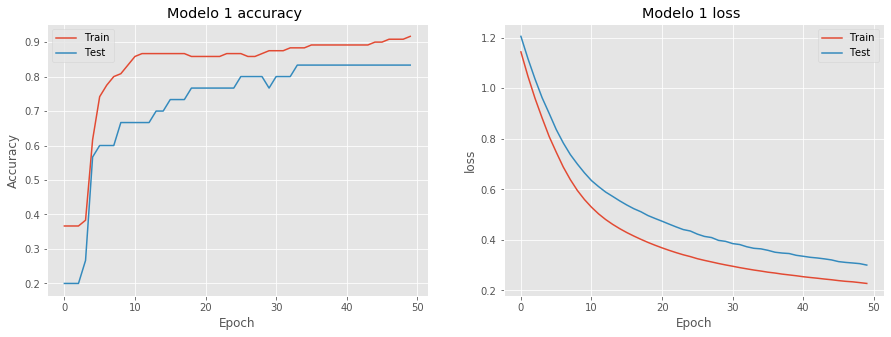

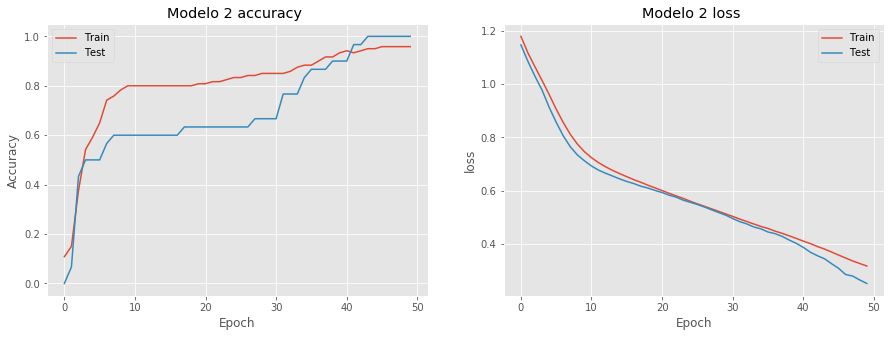

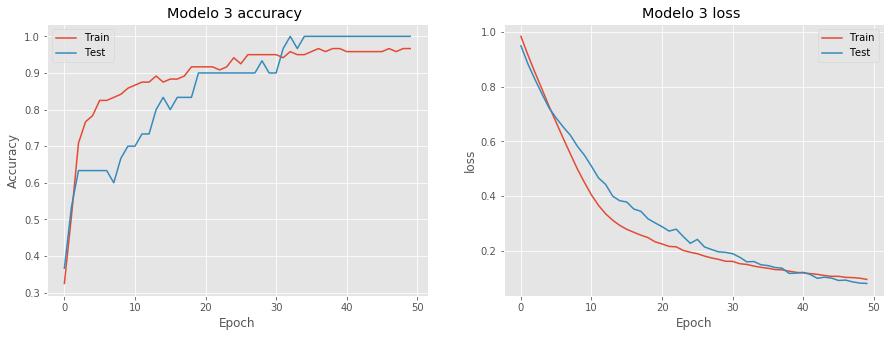

In [79]:
for i in range(len(models_fit)):
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    print(models_fit[i].history.keys())#["accuracy"])
    ax.plot(models_fit[i].history["accuracy"], label="Train")
    ax.plot(models_fit[i].history["val_accuracy"], label="Test")
    #ax.plot(k_range, distance, label="Mean distance")
    ax.title.set_text("Modelo {} accuracy ".format(i+1))
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend(loc='best')
    
    ax2.plot(models_fit[i].history["loss"], label="Train")
    ax2.plot(models_fit[i].history["val_loss"], label="Test")
    #ax.plot(k_range, distance, label="Mean distance")
    ax2.title.set_text("Modelo {} loss ".format(i+1))
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('loss')
    ax2.legend(loc='best')

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Analiza los resultados obtenidos
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Representa las fronteras de decisión que se obtienen de la red. 
</div>

El modelo 3 podría representar las fronteras de decisión que se han dispuesto en apartados anteriores.